## Importing Libraries

In [1]:
import pandas as pd 
import datetime
import numpy as np 
import seaborn as sns
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

## Reading Iris Dataset

In [2]:
iris_data = pd.read_csv('iris_data.csv')

In [3]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Scatter Plot

In [4]:
# To set fig size for plots
sns.set(rc={'figure.figsize':(11.7,8.27)})

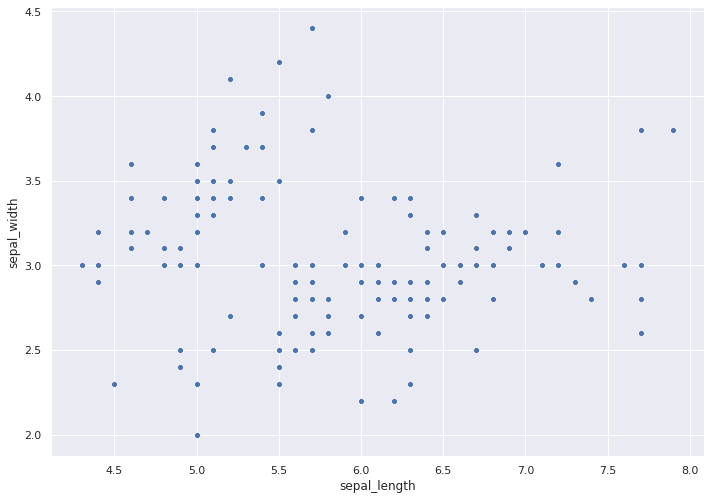

In [5]:
sns.scatterplot(x="sepal_length", y="sepal_width", data=iris_data);

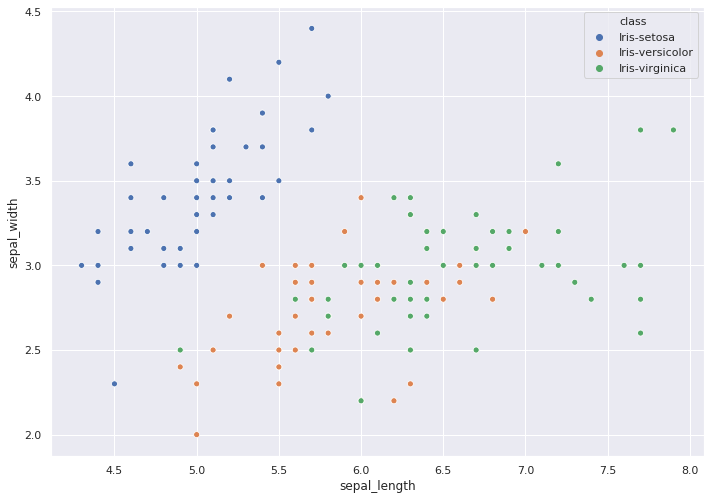

In [6]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='class', data=iris_data);

## Line Plot

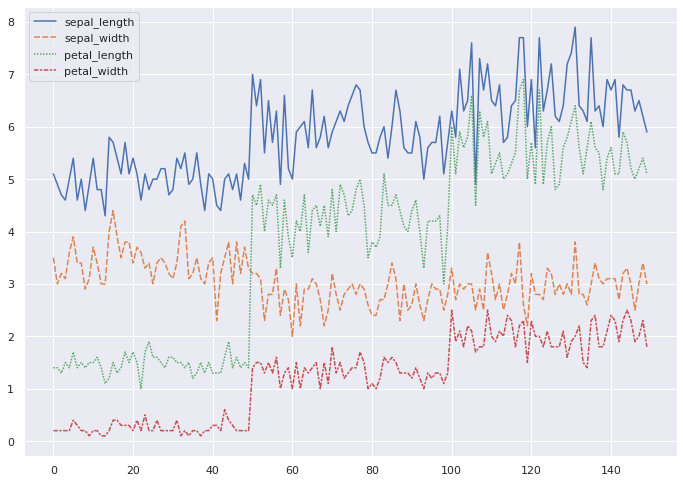

In [7]:
sns.lineplot(data=iris_data.drop(['class'], axis=1));

## Histogram Plot

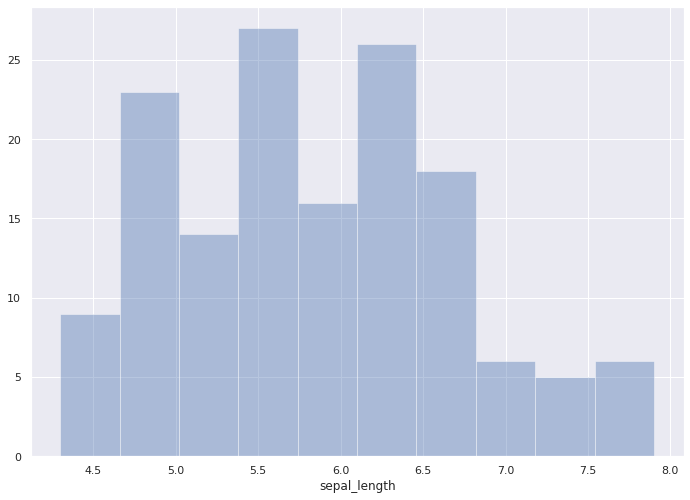

In [8]:
# Putting kde parameter to False, does not plot distribution plot of the series
sns.distplot(iris_data['sepal_length'], bins=10, kde=False);

## Plotting Histogram Plot with Distribution Plot

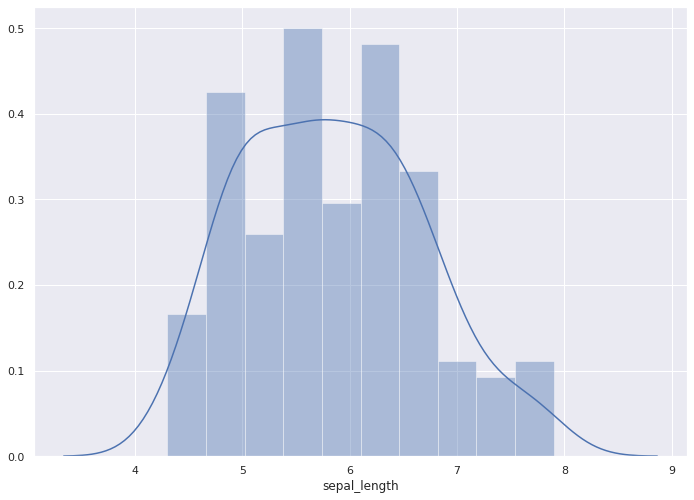

In [9]:
# Put kde=True, for plotting histogram plot with distribution plot
sns.distplot(iris_data['sepal_length'], bins=10, kde=True);

## Bar Chart

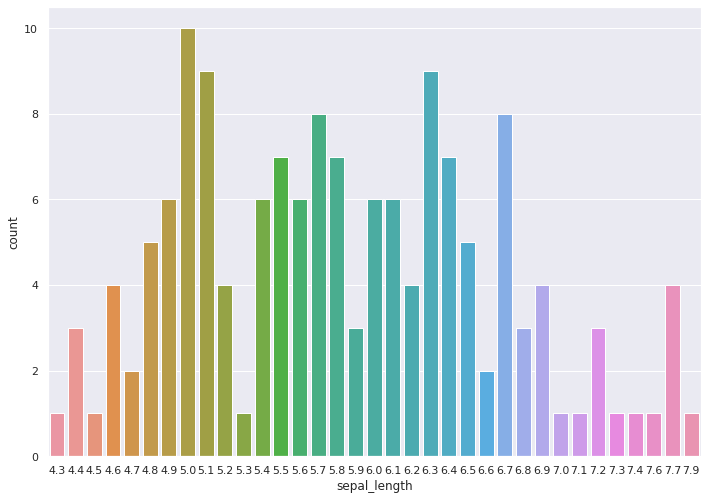

In [10]:
sns.countplot(iris_data['sepal_length']);

## Box Plot

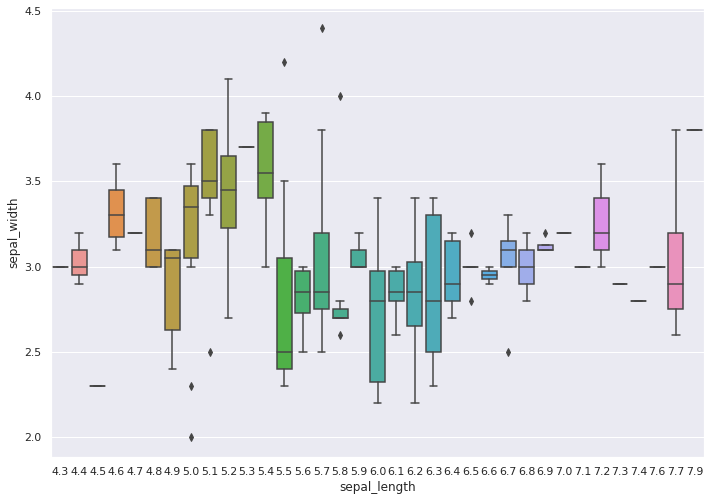

In [11]:
sns.boxplot('sepal_length', 'sepal_width', data=iris_data);

## HeatMap

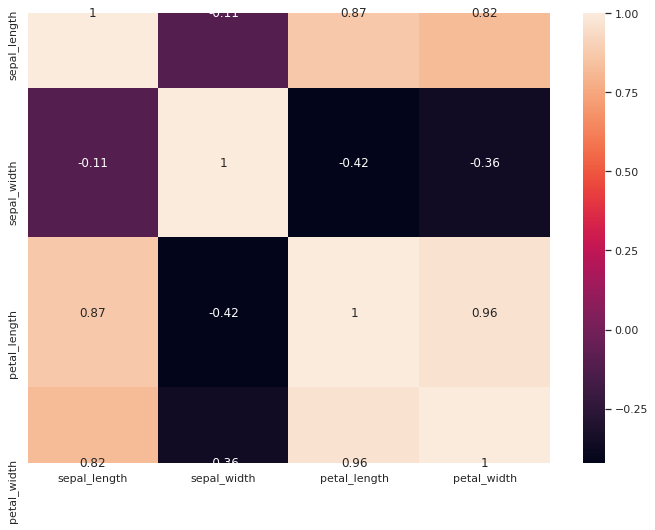

In [12]:
sns.heatmap(iris_data.corr(), annot=True)

## Faceting

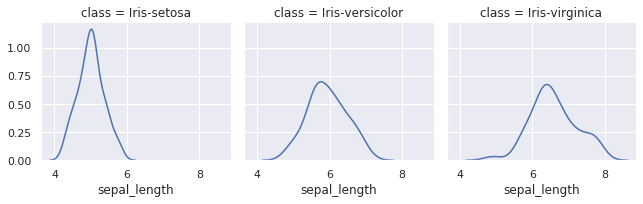

In [13]:
# Faceting is the act of breaking data variables up across multiple subplots and combining those subplots into a single figure.
# Faceting is really helpful if you want to quickly explore your dataset
g = sns.FacetGrid(iris_data, col='class')
g = g.map(sns.kdeplot, 'sepal_length')

## Pair Plot

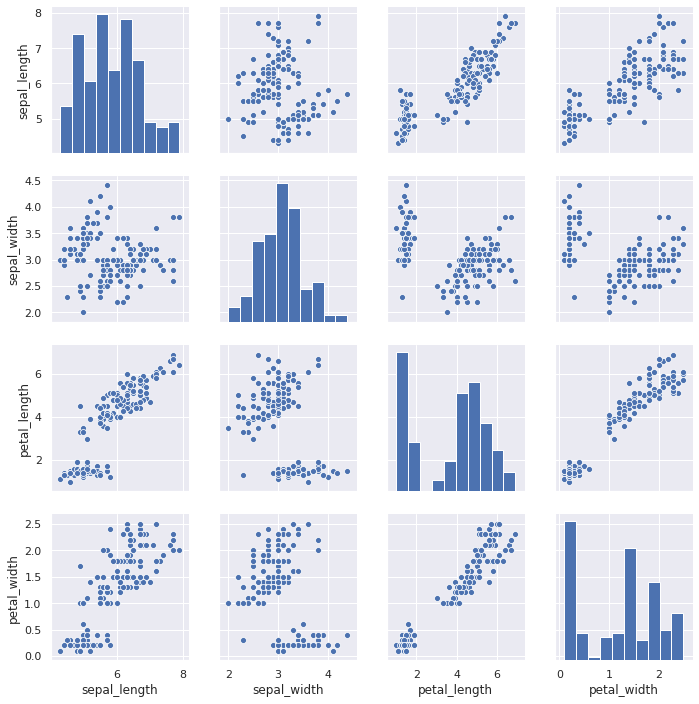

In [14]:
sns.pairplot(iris_data);

## Seaborn Plots

#### Histogram, KDE and Densities

/home/deepshikha/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


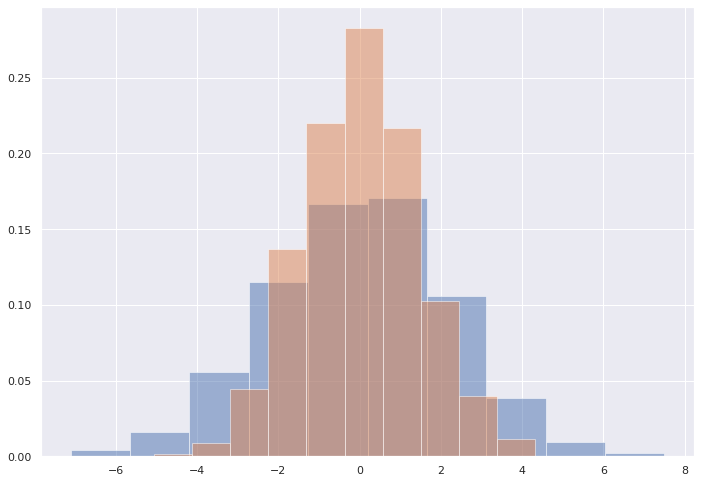

In [15]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], normed=True, alpha=0.5)

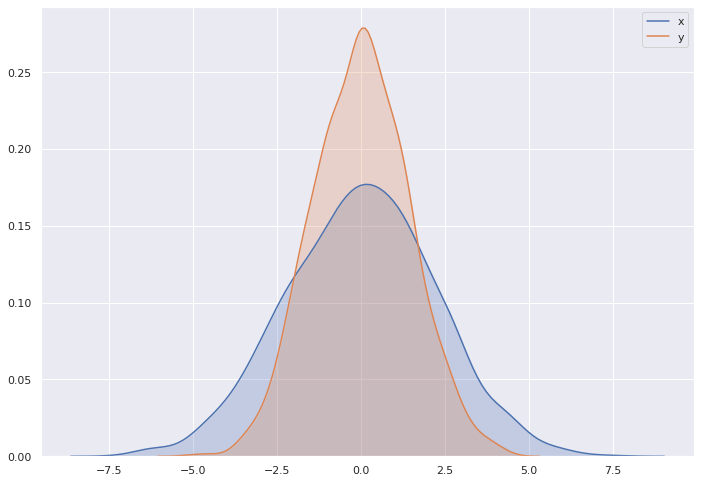

In [16]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

Histogram and KDE can be combined using Distplot

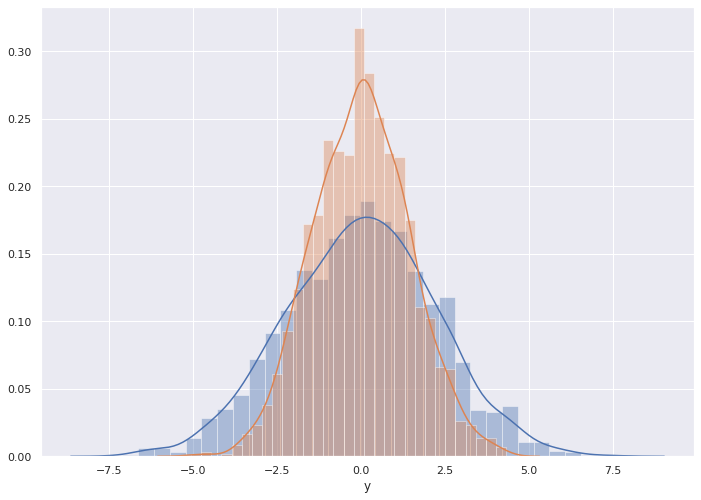

In [17]:
sns.distplot(data['x'])
sns.distplot(data['y']);

2-D Data Visualization

/home/deepshikha/.local/lib/python3.6/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


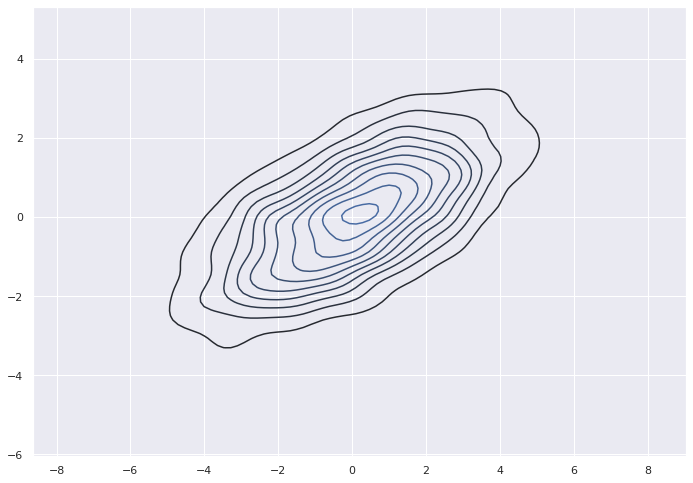

In [18]:
sns.kdeplot(data)

Joint Distribution and Marginal Distribution using jointplot in seaborn

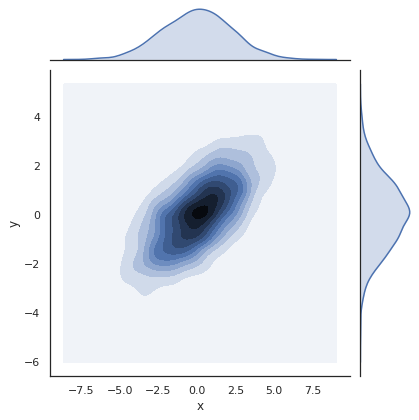

In [19]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind="kde")

Hexagonally based Histogram

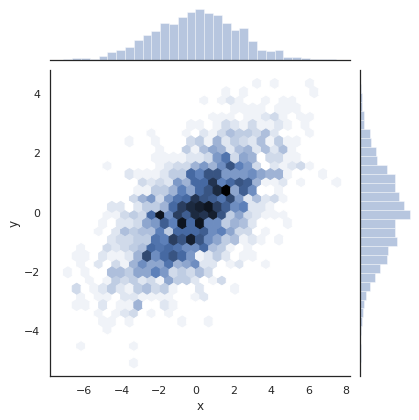

In [20]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind="hex")

## Pair Plot

It is useful for exploring correlation between multidimensional data where you plot all pairs of values against each other

In [21]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


/home/deepshikha/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


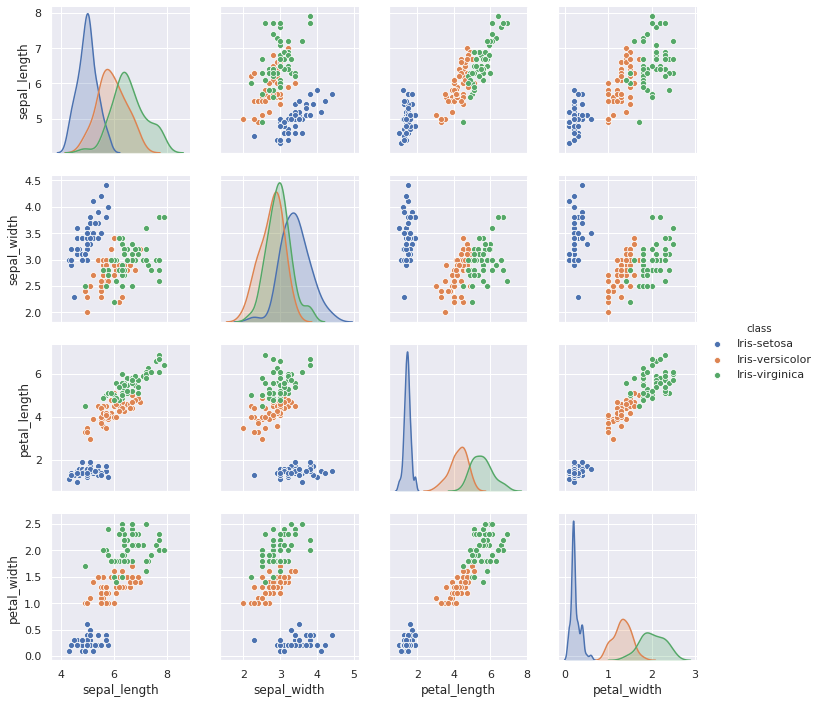

In [22]:
sns.pairplot(iris_data, hue='class', size=2.5)

## Faceted Histograms

Helps to plot histograms of subset of data

In [23]:
tips = sns.load_dataset('tips')

In [24]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [25]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

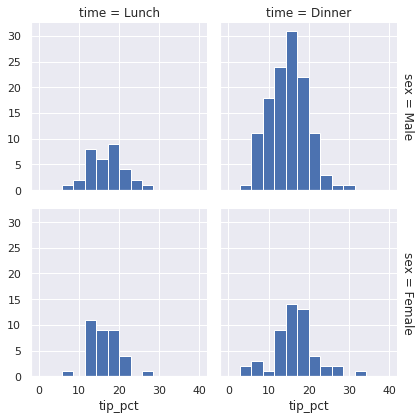

In [26]:
grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

## Factor Plot

It allows you to view distribution of a parameter within bins defined by any other parameter

/home/deepshikha/.local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


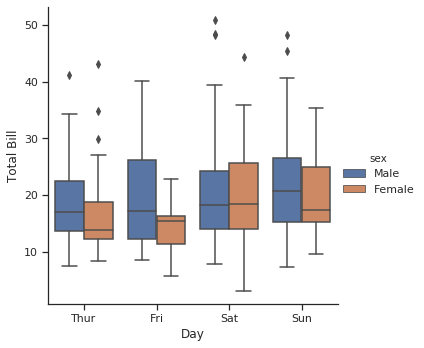

In [27]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("day", "total_bill", "sex", data=tips, kind="box")
    g.set_axis_labels("Day", "Total Bill");

## Joint Distributions

Similar to Pair Plot, can be used to show joint distribution between different datasets along with associated marginal distributions

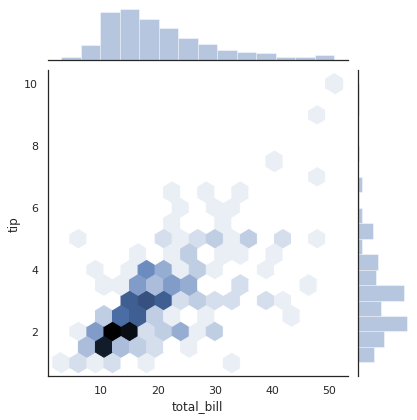

In [28]:
with sns.axes_style("white"):
    sns.jointplot("total_bill", "tip", data=tips, kind="hex")

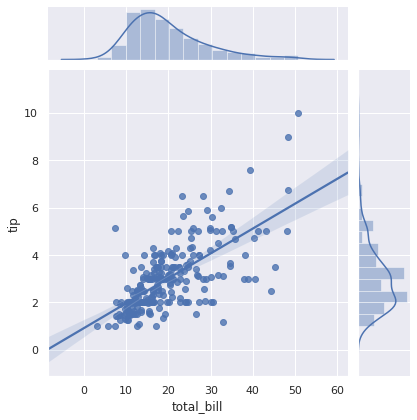

In [29]:
sns.jointplot("total_bill", "tip", data=tips, kind='reg');

## Bar Plots

In [30]:
planets = sns.load_dataset('planets')

In [31]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


/home/deepshikha/.local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


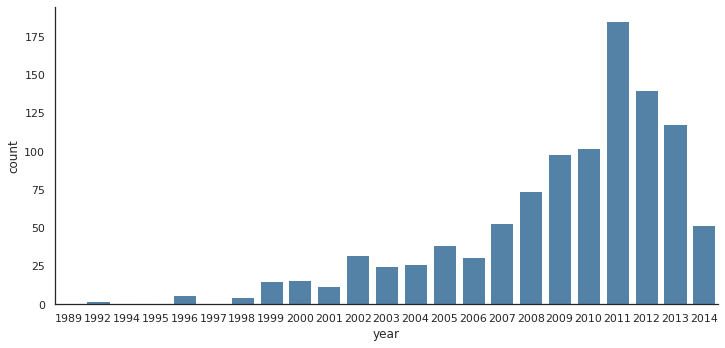

In [32]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=2, kind="count", color="steelblue")

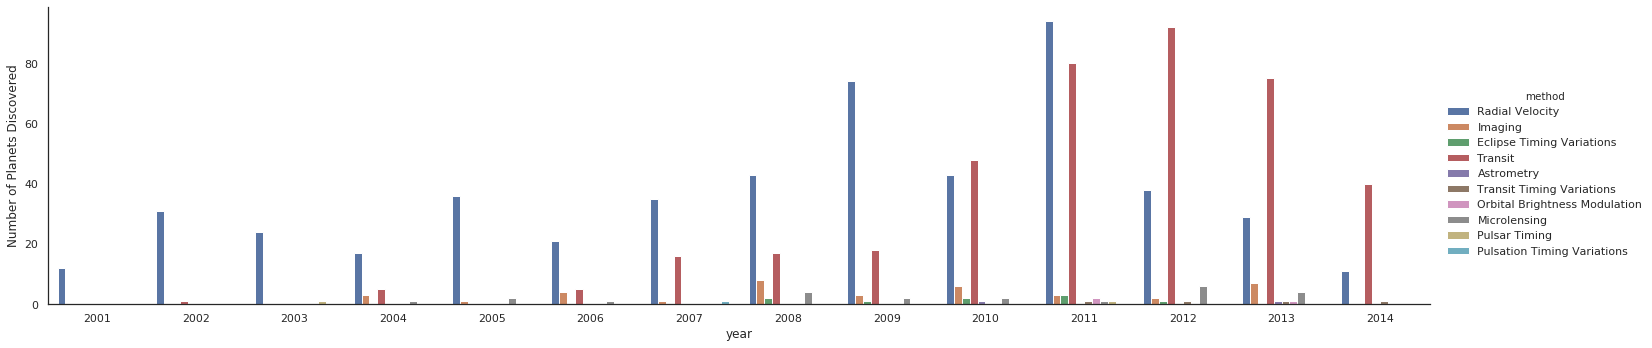

In [33]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=planets, aspect=4.0, kind='count',
                       hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

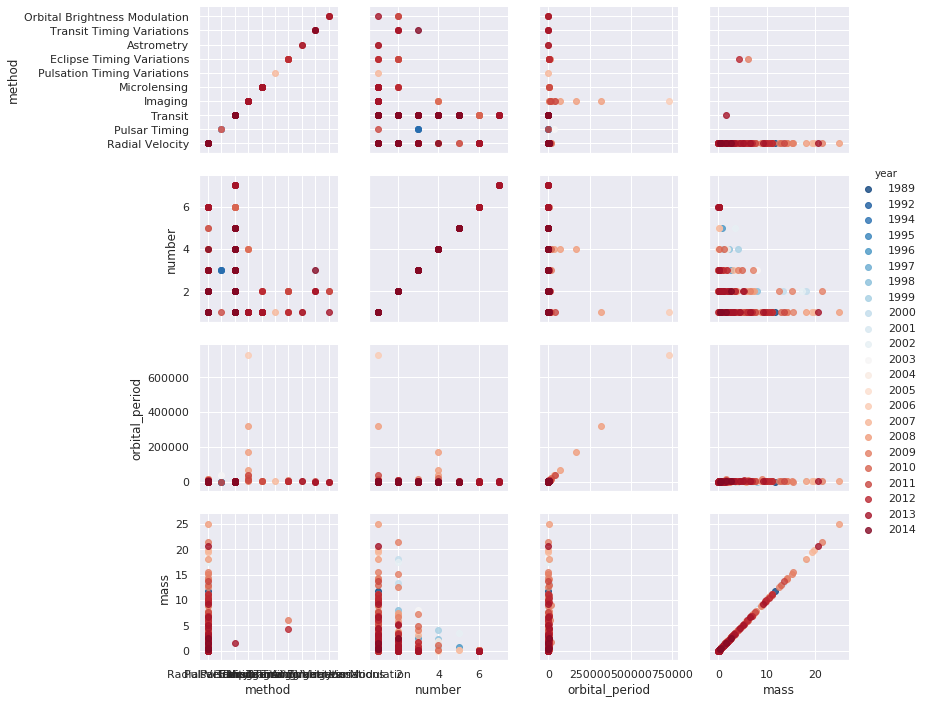

In [34]:
g = sns.PairGrid(planets, vars=['method', 'number', 'orbital_period', 'mass'],
                 hue='year', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

## Relative Plot

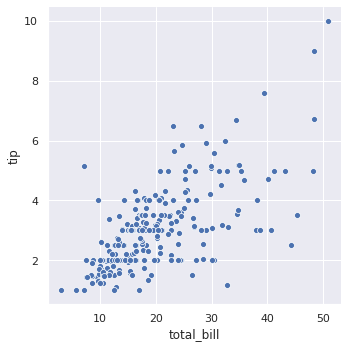

In [35]:
sns.relplot(x="total_bill", y="tip", data=tips);

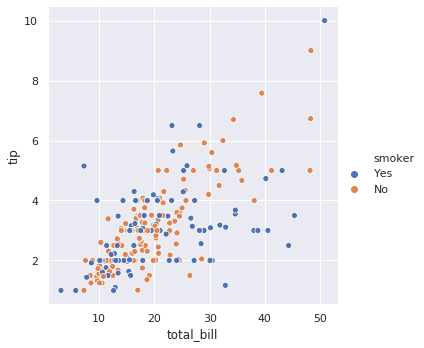

In [36]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

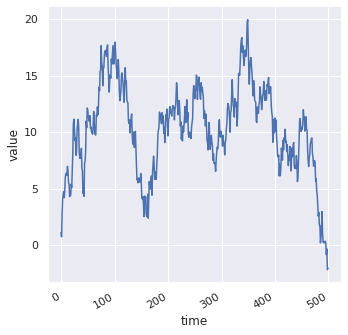

In [37]:
df = pd.DataFrame(dict(time=np.arange(500),
                      value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

## Categorical Scatter Plot

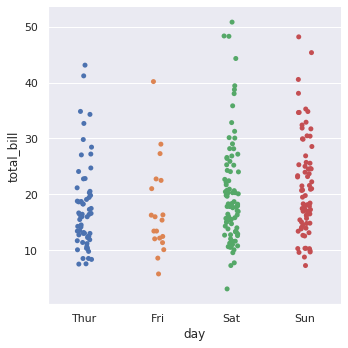

In [38]:
sns.catplot(x="day", y="total_bill", data=tips);

The jitter parameter controls the magnitude of jitter or disables it altogether:

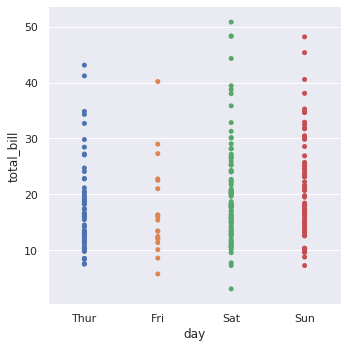

In [39]:
sns.catplot(x="day", y="total_bill", jitter=False, data=tips);

Beeswarm Plot - is drawn in seaborn by swarmplot(), which is activated by setting kind="swarm" in catplot() - can be used for relatively small dataset

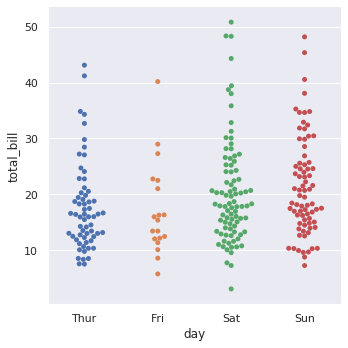

In [40]:
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips);

Adding hue to categorical plot

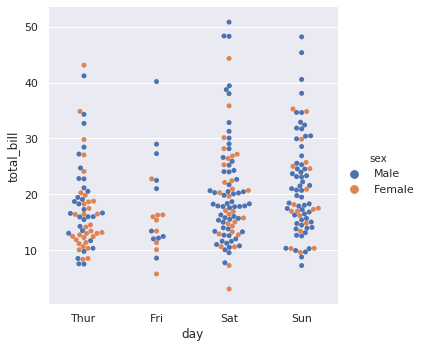

In [41]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips);

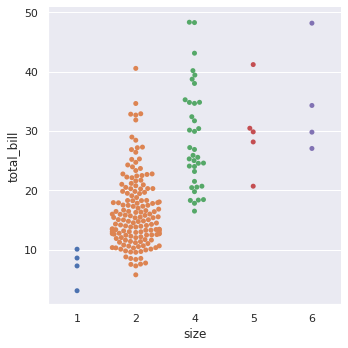

In [42]:
sns.catplot(x="size", y="total_bill", kind="swarm",
            data=tips.query("size != 3"));

Using Order Parameter in Catplot

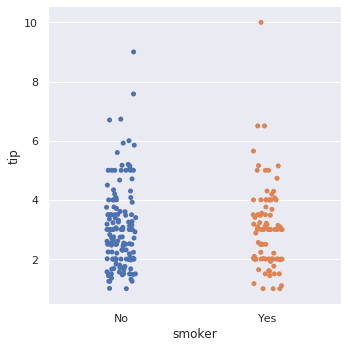

In [43]:
sns.catplot(x="smoker", y="tip", order=["No", "Yes"], data=tips);

Box Plot using Catplot

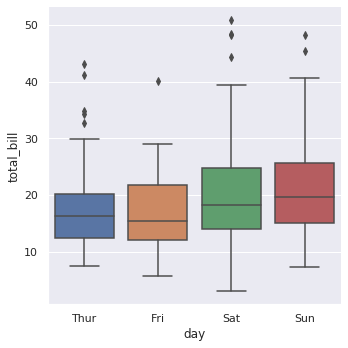

In [44]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips);

Box Plot with hue parameter

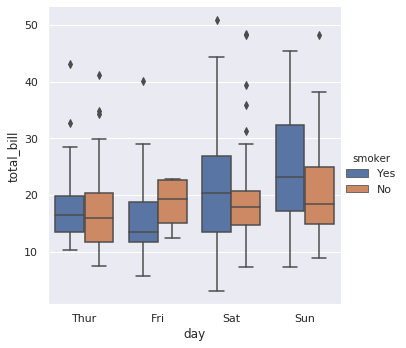

In [45]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips);

This behavior is called “dodging” and is turned on by default because it is assumed that the semantic variable is nested within the main categorical variable. If that’s not the case, you can disable the dodging:

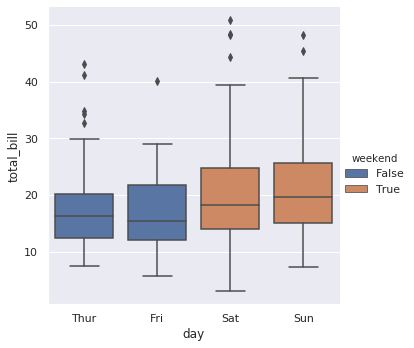

In [46]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.catplot(x="day", y="total_bill", hue="weekend",
            kind="box", dodge=False, data=tips);

A related function, boxenplot(), draws a plot that is similar to a box plot but optimized for showing more information about the shape of the distribution. It is best suited for larger datasets:

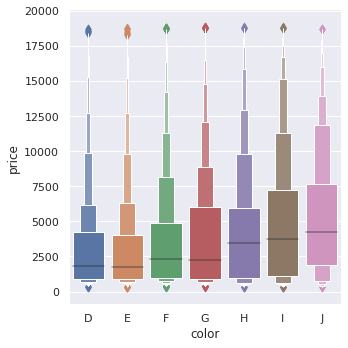

In [47]:
diamonds = sns.load_dataset("diamonds")
sns.catplot(x="color", y="price", kind="boxen",
            data=diamonds.sort_values("color"));

__Violin Plots Using Catplot__ - combines a boxplot with the kernel density estimation procedure.

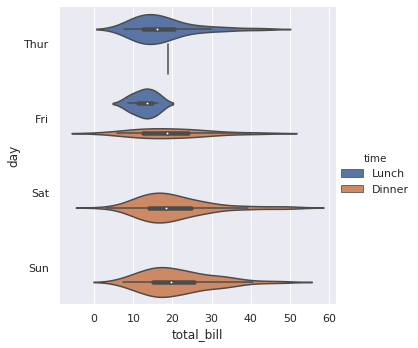

In [48]:
sns.catplot(x="total_bill", y="day", hue="time",
            kind="violin", data=tips);

This approach uses the kernel density estimate to provide a richer description of the distribution of values. Additionally, the quartile and whikser values from the boxplot are shown inside the violin. The downside is that, because the violinplot uses a KDE, there are some other parameters that may need tweaking, adding some complexity relative to the straightforward boxplot.

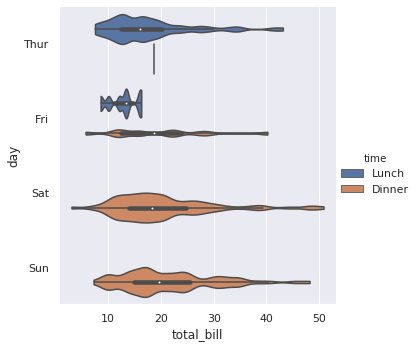

In [49]:
sns.catplot(x="total_bill", y="day", hue="time",
            kind="violin", bw=.15, cut=0,
            data=tips);

It’s also possible to “split” the violins when the hue parameter has only two levels, which can allow for a more efficient use of space.

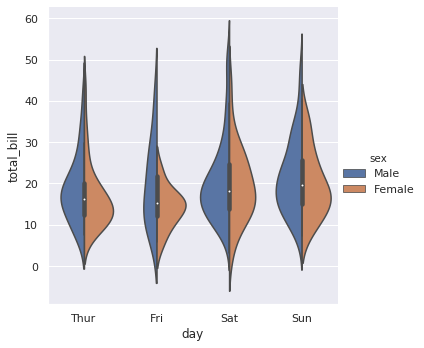

In [50]:
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", split=True, data=tips);

Finally, there are several options for the plot that is drawn on the interior of the violins, including ways to show each individual observation instead of the summary boxplot values.

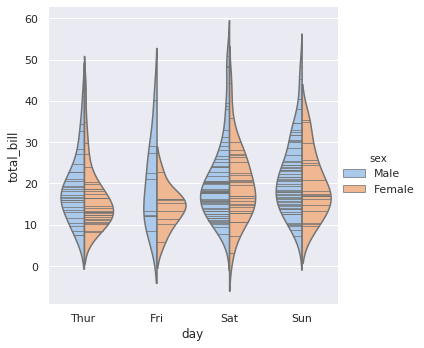

In [51]:
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", inner="stick", split=True,
            palette="pastel", data=tips);

It can also be useful to combine swarmplot() or striplot() with a box plot or violin plot to show each observation along with a summary of the distribution.

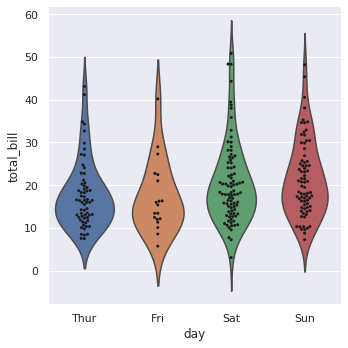

In [52]:
g = sns.catplot(x="day", y="total_bill", kind="violin", inner=None, data=tips)
sns.swarmplot(x="day", y="total_bill", color="k", size=3, data=tips, ax=g.ax);

__Bar Plot using Catplot__

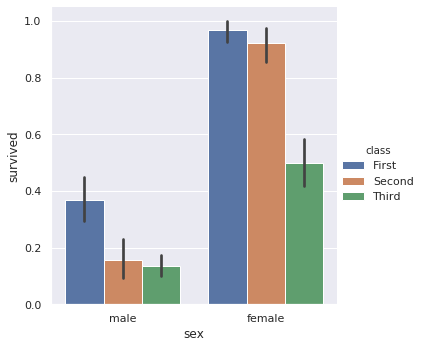

In [53]:
titanic = sns.load_dataset("titanic")
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic);

A special case for the bar plot is when you want to show the number of observations in each category rather than computing a statistic for a second variable. This is similar to a histogram over a categorical, rather than quantitative, variable. In seaborn, it’s easy to do so with the countplot() function

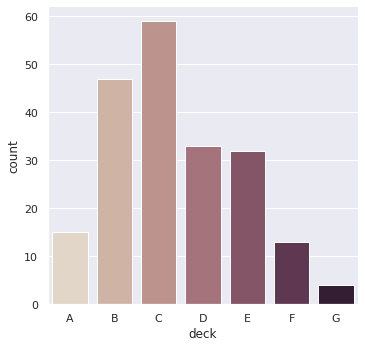

In [54]:
sns.catplot(x="deck", kind="count", palette="ch:.25", data=titanic);

Both barplot() and countplot() can be invoked with all of the options discussed above, along with others that are demonstrated in the detailed documentation for each function

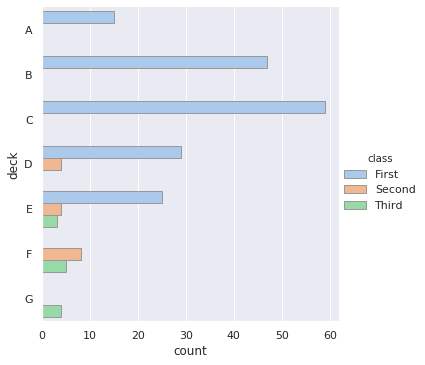

In [55]:
sns.catplot(y="deck", hue="class", kind="count",
            palette="pastel", edgecolor=".6",
            data=titanic);

__Point Plot using Catplot__

This function also encodes the value of the estimate with height on the other axis, but rather than showing a full bar, it plots the point estimate and confidence interval. Additionally, pointplot() connects points from the same hue category. This makes it easy to see how the main relationship is changing as a function of the hue semantic, because your eyes are quite good at picking up on differences of slopes.

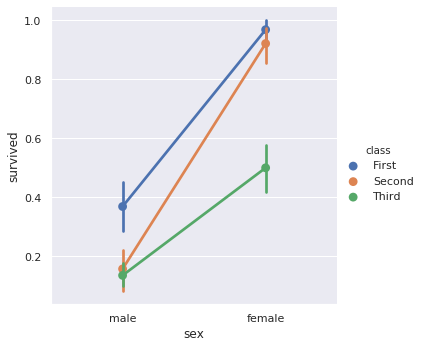

In [56]:
sns.catplot(x="sex", y="survived", hue="class", kind="point", data=titanic);

When the categorical functions lack the style semantic of the relational functions, it can still be a good idea to vary the marker and/or linestyle along with the hue to make figures that are maximally accessible and reproduce well in black and white.

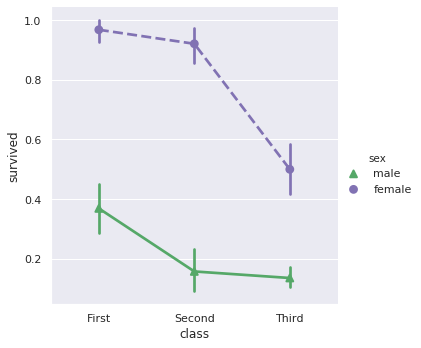

In [57]:
sns.catplot(x="class", y="survived", hue="sex",
            palette={"male": "g", "female": "m"},
            markers=["^", "o"], linestyles=["-", "--"],
            kind="point", data=titanic);

__Plotting “wide-form” data using Catplot__

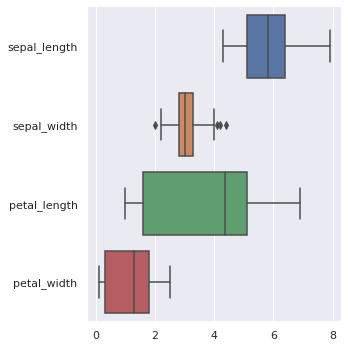

In [58]:
sns.catplot(data=iris_data, orient="h", kind="box");

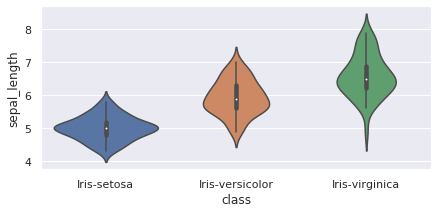

In [62]:
# To set the size of the figure
f, ax = plt.subplots(figsize=(7, 3))
sns.violinplot(x=iris_data['class'], y=iris_data['sepal_length']);

__Showing Multiple Relationships with Facets__

Just like relplot(), the fact that catplot() is built on a FacetGrid means that it is easy to add faceting variables to visualize higher-dimensional relationships.

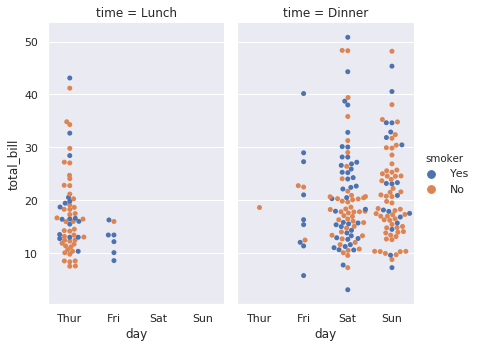

In [63]:
sns.catplot(x="day", y="total_bill", hue="smoker",
            col="time", aspect=.6,
            kind="swarm", data=tips);

For further customization of the plot, you can use the methods on the FacetGrid object that it returns.

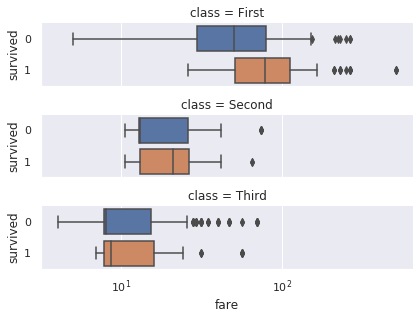

In [64]:
g = sns.catplot(x="fare", y="survived", row="class",
                kind="box", orient="h", height=1.5, aspect=4,
                data=titanic.query("fare > 0"))
g.set(xscale="log");